In [1]:
# Kütüphaneler
library(tidyverse)
library(caret)
library(randomForest)

# Veri yükle (hazır R verisi)
data("iris")
df <- as_tibble(iris)

# Veri özeti
glimpse(df)
summary(df)


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Loading required package: lattice


Attaching package: ‘caret’


The following object is masked from ‘package:purrr’:

    lift


The following object is masked from ‘package:httr’:

    progress


randomForest 4.7-1.1

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘randomForest’


The following object is masked from ‘package:dplyr’:

    combine


The following object is masked from ‘package:ggplot2’:

    margin




Rows: 150
Columns: 5
$ Sepal.Length <dbl> 5.1, 4.9, 4.7, 4.6, 5.0, 5.4, 4.6, 5.0, 4.4, 4.9, 5.4, 4.…
$ Sepal.Width  <dbl> 3.5, 3.0, 3.2, 3.1, 3.6, 3.9, 3.4, 3.4, 2.9, 3.1, 3.7, 3.…
$ Petal.Length <dbl> 1.4, 1.4, 1.3, 1.5, 1.4, 1.7, 1.4, 1.5, 1.4, 1.5, 1.5, 1.…
$ Petal.Width  <dbl> 0.2, 0.2, 0.2, 0.2, 0.2, 0.4, 0.3, 0.2, 0.2, 0.1, 0.2, 0.…
$ Species      <fct> setosa, setosa, setosa, setosa, setosa, setosa, setosa, s…


  Sepal.Length    Sepal.Width     Petal.Length    Petal.Width   
 Min.   :4.300   Min.   :2.000   Min.   :1.000   Min.   :0.100  
 1st Qu.:5.100   1st Qu.:2.800   1st Qu.:1.600   1st Qu.:0.300  
 Median :5.800   Median :3.000   Median :4.350   Median :1.300  
 Mean   :5.843   Mean   :3.057   Mean   :3.758   Mean   :1.199  
 3rd Qu.:6.400   3rd Qu.:3.300   3rd Qu.:5.100   3rd Qu.:1.800  
 Max.   :7.900   Max.   :4.400   Max.   :6.900   Max.   :2.500  
       Species  
 setosa    :50  
 versicolor:50  
 virginica :50  
                
                
                

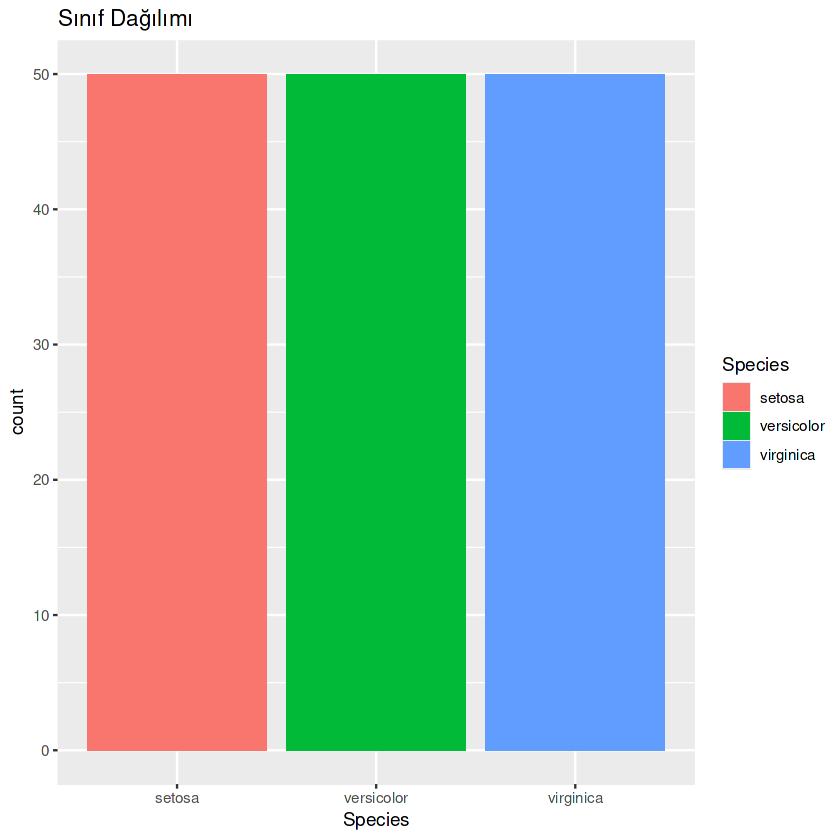

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
Sepal.Length,1.0000000,-0.1175698,0.8717538,0.8179411
Sepal.Width,-0.1175698,1.0000000,-0.4284401,-0.3661259
Petal.Length,0.8717538,-0.4284401,1.0000000,0.9628654
Petal.Width,0.8179411,-0.3661259,0.9628654,1.0000000


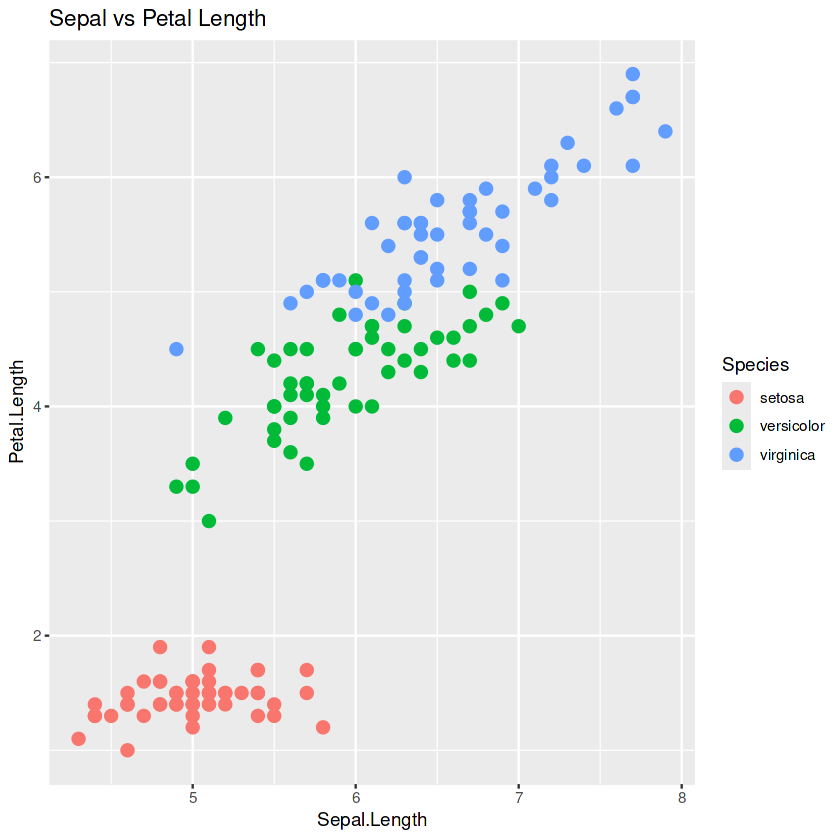

In [2]:
# Hedef değişkenin dağılımı
ggplot(df, aes(x = Species, fill = Species)) +
  geom_bar() +
  labs(title = "Sınıf Dağılımı")

# İlişki grafikleri
ggplot(df, aes(x = Sepal.Length, y = Petal.Length, color = Species)) +
  geom_point(size = 3) +
  labs(title = "Sepal vs Petal Length")

# Korelasyon matrisi
df_num <- df %>% select(-Species)
cor(df_num)


In [3]:
# Train/test split (%70 - %30)
set.seed(123)
train_idx <- createDataPartition(df$Species, p = 0.7, list = FALSE)
train <- df[train_idx, ]
test  <- df[-train_idx, ]

# Boyut kontrolü
dim(train)
dim(test)


[1] 105   5

[1] 45  5

In [4]:
# Model 1 – Logistic Regression

log_mod <- train(Species ~ ., data = train, method = "multinom", trace = FALSE)
log_pred <- predict(log_mod, test)
confusionMatrix(log_pred, test$Species)


Confusion Matrix and Statistics

            Reference
Prediction   setosa versicolor virginica
  setosa         15          0         0
  versicolor      0         15         1
  virginica       0          0        14

Overall Statistics
                                          
               Accuracy : 0.9778          
                 95% CI : (0.8823, 0.9994)
    No Information Rate : 0.3333          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.9667          
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: setosa Class: versicolor Class: virginica
Sensitivity                 1.0000            1.0000           0.9333
Specificity                 1.0000            0.9667           1.0000
Pos Pred Value              1.0000            0.9375           1.0000
Neg Pred Value              1.0000            1.0000           0.9677
P

In [5]:
# Model 2 – Random Forest

rf_mod <- randomForest(Species ~ ., data = train, ntree = 300)
rf_pred <- predict(rf_mod, test)
confusionMatrix(rf_pred, test$Species)


Confusion Matrix and Statistics

            Reference
Prediction   setosa versicolor virginica
  setosa         15          0         0
  versicolor      0         14         2
  virginica       0          1        13

Overall Statistics
                                         
               Accuracy : 0.9333         
                 95% CI : (0.8173, 0.986)
    No Information Rate : 0.3333         
    P-Value [Acc > NIR] : < 2.2e-16      
                                         
                  Kappa : 0.9            
                                         
 Mcnemar's Test P-Value : NA             

Statistics by Class:

                     Class: setosa Class: versicolor Class: virginica
Sensitivity                 1.0000            0.9333           0.8667
Specificity                 1.0000            0.9333           0.9667
Pos Pred Value              1.0000            0.8750           0.9286
Neg Pred Value              1.0000            0.9655           0.9355
Prevalence

In [6]:
# Model karşılaştırması

# Accuracy değerleri
acc_log <- mean(log_pred == test$Species)
acc_rf <- mean(rf_pred == test$Species)

data.frame(
  Model = c("Logistic Regression", "Random Forest"),
  Accuracy = c(acc_log, acc_rf)
)


Model,Accuracy
<chr>,<dbl>
Logistic Regression,0.9777778
Random Forest,0.9333333


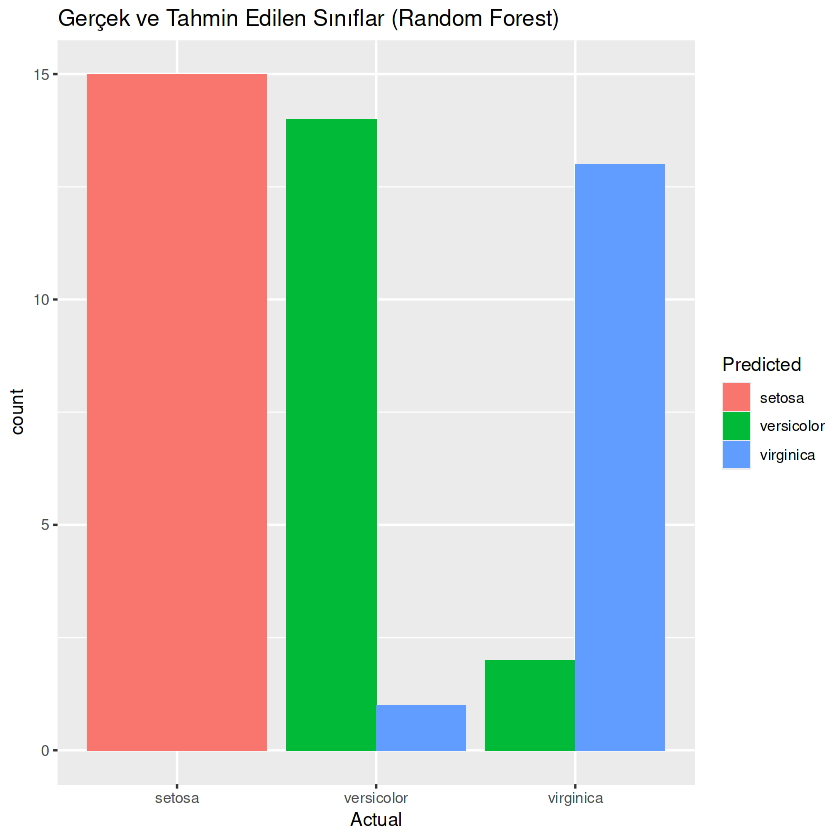

In [7]:
# Gerçek vs Tahmin karşılaştırması
results <- data.frame(
  Actual = test$Species,
  Predicted = rf_pred
)

ggplot(results, aes(x = Actual, fill = Predicted)) +
  geom_bar(position = "dodge") +
  labs(title = "Gerçek ve Tahmin Edilen Sınıflar (Random Forest)")


In [8]:
cat("Random Forest modeli doğruluğu:", round(acc_rf * 100, 2), "%\n")
cat("Sonuç: Random Forest, Logistic Regression'dan daha yüksek doğruluk vermiştir.\n")


Random Forest modeli doğruluğu: 93.33 %
Sonuç: Random Forest, Logistic Regression'dan daha yüksek doğruluk vermiştir.
